## Facilitator

Ali Haider - Technical Lead - GDSC Iowa State University

### Links

- LinkedIn: https://www.linkedin.com/in/m-ali-haider/
- Email: mhaider@iastate.edu
- Github: https://github.com/allihaider
- Medium: https://medium.com/@m.allihaider


---

## Topics
1. Dealing with Missing Values
2. Using Categorical Variables
3. Pipelines
4. Cross Validation


## Dealing with Missing Values


In [ ]:
# Presence of missing values in real world data
# Most libraries throw errors when missing values are passed
# Dropping columns
# Imputation, replacing with average

### Random Forest Model

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv("melb_data.csv")
df = df.dropna(axis=0)

In [ ]:
y = df["Price"]
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = df[features]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
model = RandomForestRegressor(n_estimators=50, random_state=1)
model.fit(train_X, train_y)

RandomForestRegressor(n_estimators=50, random_state=1)

In [ ]:
predictions = model.predict(test_X)
print(mean_absolute_error(test_y, predictions))

181132.7537357911


### Imputation

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
my_imputer = SimpleImputer()

In [ ]:
test_dict = {"Scores": [88, 75, 100, 50, None, 77]}
test_df = pd.DataFrame.from_dict(test_dict)

In [ ]:
test_df

,Scores
0,88.0
1,75.0
2,100.0
3,50.0
4,NaN
5,77.0


In [ ]:
my_imputer.fit_transform(test_df)

array([[ 88.],
       [ 75.],
       [100.],
       [ 50.],
       [ 78.],
       [ 77.]])

### Random Forest Model with Imputation

In [ ]:
df = pd.read_csv("melb_data.csv")

In [ ]:
y = df["Price"]
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = df[features]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
imputed_train_X = pd.DataFrame(my_imputer.fit_transform(train_X))
imputed_test_X = pd.DataFrame(my_imputer.transform(test_X))

In [ ]:
imputed_train_X.columns = train_X.columns
imputed_test_X.columns = test_X.columns

In [ ]:
model = RandomForestRegressor(n_estimators=50, random_state=1)
model.fit(imputed_train_X, train_y)

RandomForestRegressor(n_estimators=50, random_state=1)

In [ ]:
predictions = model.predict(imputed_test_X)
print(mean_absolute_error(test_y, predictions))

174254.63829616384


## Using Categorical Variables

In [ ]:
# What are categorical variables?
# Dealing with them
  # Drop categorical variables
  # Ordinal encoding
  # One hot encoding

### One-hot Encoding

Source: https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39

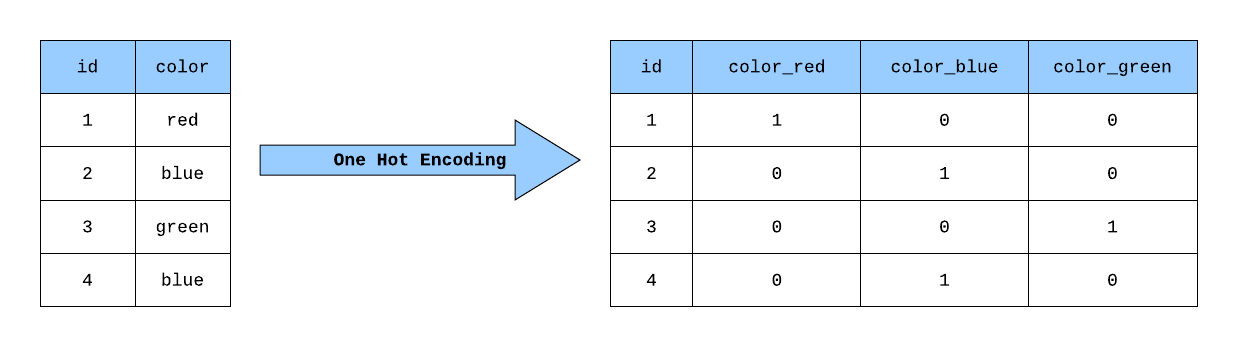

In [ ]:
df = pd.read_csv("melb_data.csv")

In [ ]:
y = df["Price"]
numerical_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
categorical_features = ['Type', 'Method', 'Regionname']
X = df[numerical_features + categorical_features]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
imputed_train_X = pd.DataFrame(my_imputer.fit_transform(train_X[numerical_features]))
imputed_test_X = pd.DataFrame(my_imputer.transform(test_X[numerical_features]))

In [ ]:
imputed_train_X.columns = numerical_features
imputed_test_X.columns = numerical_features

### Random Forest with Imputation and One-hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
OH_train_X = pd.DataFrame(OH_encoder.fit_transform(train_X[categorical_features]))
OH_test_X = pd.DataFrame(OH_encoder.transform(test_X[categorical_features]))

In [ ]:
categorical_features

['Type', 'Method', 'Regionname']

In [ ]:
OH_train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12218,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12219,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12220,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
OH_imputed_train_X = pd.concat([imputed_train_X, OH_train_X], axis=1)
OH_imputed_test_X = pd.concat([imputed_test_X, OH_test_X], axis=1)

In [ ]:
model = RandomForestRegressor(n_estimators=50, random_state=1)
model.fit(OH_imputed_train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestRegressor(n_estimators=50, random_state=1)

In [ ]:
predictions = model.predict(OH_imputed_test_X)
print(mean_absolute_error(test_y, predictions))

164775.7646910723


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## Pipelines

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numerical_transformer = SimpleImputer()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
numerical_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
categorical_features = ['Type', 'Method', 'Regionname']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
model = RandomForestRegressor(n_estimators=50, random_state=1)

In [ ]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [ ]:
df = pd.read_csv("melb_data.csv")

In [ ]:
y = df["Price"]
X = df[numerical_features + categorical_features]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
my_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Rooms', 'Bathroom',
                                                   'Landsize', 'Lattitude',
                                                   'Longtitude']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Type', 'Method',
                                                   'Regionname'])])),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=1))])

In [ ]:
predictions = my_pipeline.predict(test_X)
print(mean_absolute_error(test_y, predictions))

164775.7646910723


## Cross Validation

In [ ]:
# Cross validation concept
# Use with smaller datasets, no real need with large datasets

In [ ]:
numerical_transformer = SimpleImputer()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
numerical_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
categorical_features = ['Type', 'Method', 'Regionname']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
model = RandomForestRegressor(n_estimators=50, random_state=1)

In [ ]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [ ]:
df = pd.read_csv("melb_data.csv")

In [ ]:
y = df["Price"]
numerical_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
categorical_features = ['Type', 'Method', 'Regionname']
X = df[numerical_features + categorical_features]

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = -1 * cross_val_score(my_pipeline, X, y, cv=10, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)

MAE scores:
 [225914.20198331 193490.64865068 222890.87105828 170568.66874465
 206145.56052458 178406.03307665 158216.61648187 157070.5091956
 146895.79789607 176929.34546392]


In [ ]:
scores.mean()

183652.82530756015

## Time to test your knowledge!

### Question 1 - Gradient Boosting Machines

Use scikit learn to train an XGBoost model instead of a random forest to solve the problem above. Submit your code!


## What's next?

- Kaggle course: https://www.kaggle.com/learn/intermediate-machine-learning
- Scikit-learn docs: https://scikit-learn.org/stable/


## ML Study Jam Summary

- Intro to Python Programming
- Data Analysis with Pandas
- Basic Machine Learning Concepts
- Intermediate Machine Learning


## Machine Learning Tech Talk next week!

We have free food and free swag next week, and we're inviting a machine learning industry expert to give an ML tech talk on his lessons learned in applying ML in the real world.

Please register here:
https://organize.mlh.io/participants/events/8792-machine-learning-tech-talk-at-iowa-state-university